Hussein Hamie
500876254
AER 850 Machine Learning
Assignment 1

We Begin by importing the initial libraries for plotting and data preprocessing

In [67]:
# Importing of libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Function used to import datasets. The function saves X and Y Columns as Numpy arrays and reshapes them in 2D form.


In [68]:
def getdata(filename):
    with open (filename,'r') as csvfile:
        csvData = pd.read_csv(csvfile,header=None)
        #Ordering the data properly
        csvData.sort_values(csvData.columns[0],axis=0,inplace=True)
        print(csvData)
        X = csvData.iloc[:,[0]].to_numpy()
        Y = csvData.iloc[:,[1]].to_numpy()
        print(X)


    return X , Y

Importing all datasets using get data function and assigning X and Y respectively

In [69]:
X_test, Y_test = getdata("Dataset1/Dataset_1_test.csv")
X_train, Y_train = getdata("Dataset1/Dataset_1_train.csv")
X_valid, Y_valid = getdata("Dataset1/Dataset_1_valid.csv")

           0          1   2
31 -0.988770  -6.497606 NaN
23 -0.913618  -5.110324 NaN
32 -0.895417 -11.813734 NaN
3  -0.860443  -3.800950 NaN
2  -0.819361  -9.321124 NaN
37 -0.789856  -5.923314 NaN
11 -0.780743 -10.921434 NaN
49 -0.758574 -10.768728 NaN
24 -0.698714 -11.098282 NaN
6  -0.627858  -6.709161 NaN
39 -0.618156  -3.162021 NaN
48 -0.499098   2.344141 NaN
12 -0.488943 -10.539182 NaN
13 -0.458625  -3.586555 NaN
8  -0.427498  -3.513751 NaN
35 -0.414263  -6.832803 NaN
0  -0.335254  -2.953401 NaN
33 -0.300863   1.659256 NaN
17 -0.283256  -6.700334 NaN
44 -0.215044  -0.091022 NaN
21 -0.184763  -5.287415 NaN
18 -0.097897  -5.630283 NaN
40 -0.076718  -2.946125 NaN
27 -0.073859  -6.728111 NaN
5  -0.007729  -3.405798 NaN
1   0.122457  -5.836786 NaN
26  0.191167  -0.802697 NaN
36  0.194400  -4.639020 NaN
20  0.232616   0.908847 NaN
41  0.239000  -3.462470 NaN
9   0.352504  -3.073887 NaN
28  0.411078   5.010641 NaN
19  0.419778   1.357183 NaN
4   0.422628   2.100318 NaN
22  0.442216  -4.053

Now we plot all three data sets, so we can visualize the distribution we are trying to plot

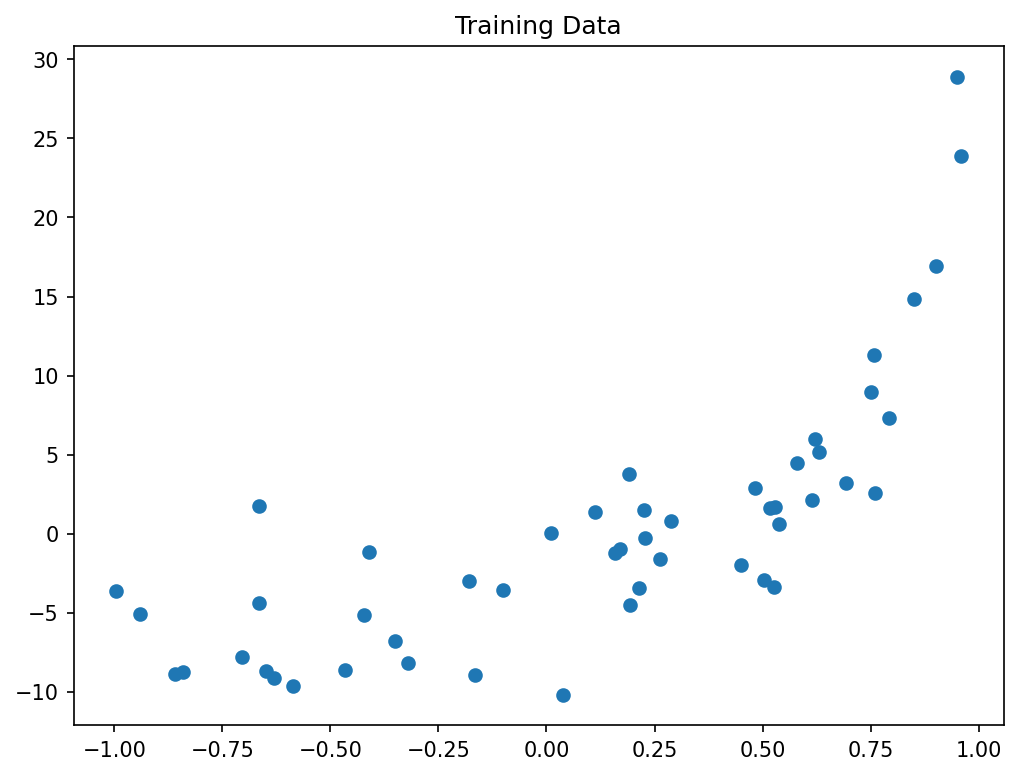

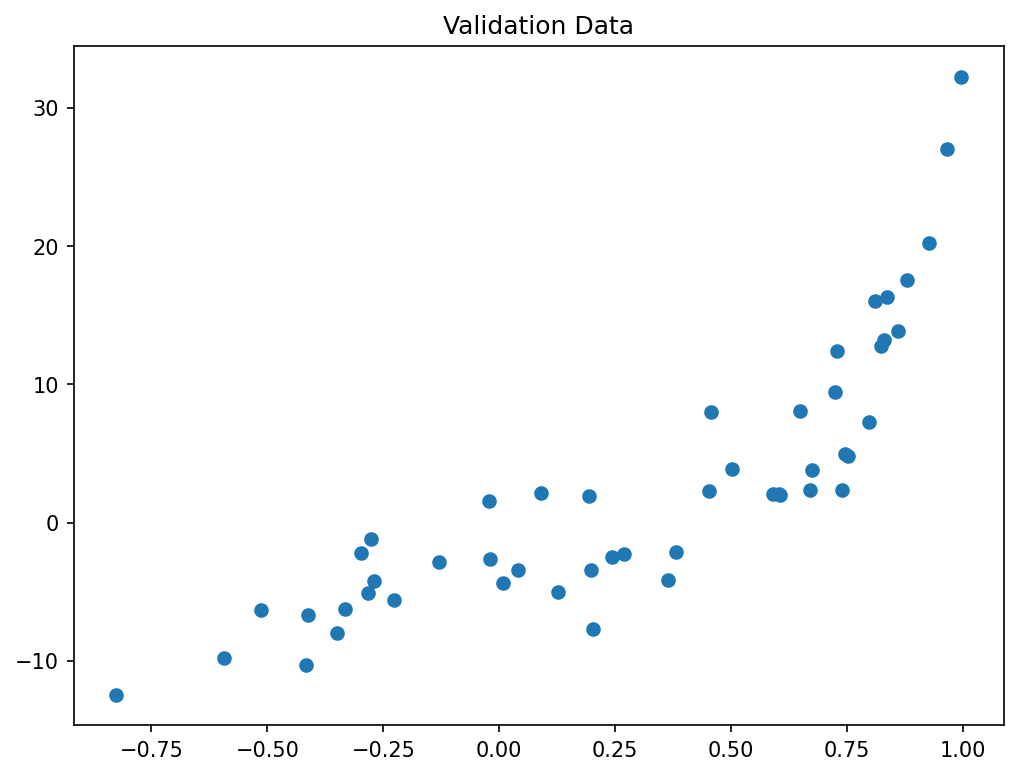

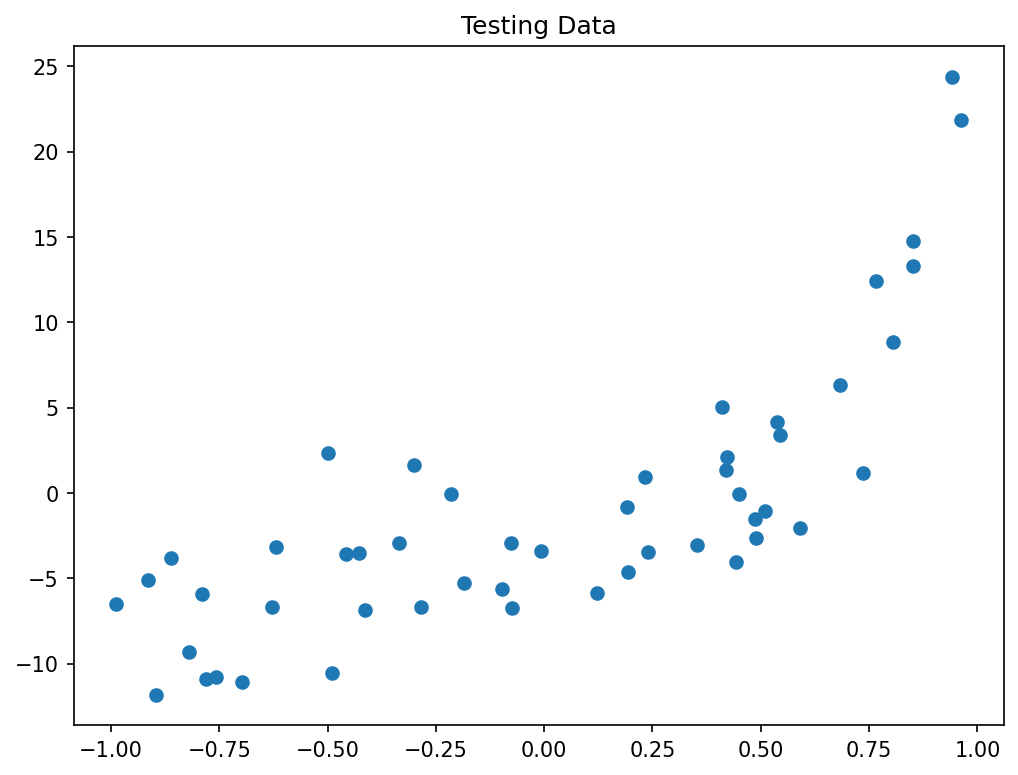

In [70]:
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train)
plt.title('Training Data')
plt.show()

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid)
plt.title('Validation Data')
plt.show()

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_test,Y_test)
plt.title('Testing Data')
plt.show()

Part A: Fitting 20 degree polynomial

In [74]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

This function we will use to create an array of transformed data to the 20th degree. This will  allow us to fit the data via linear regression and achieve polynomial non-linear regression.

In [73]:
poly_reg_model = LinearRegression()
def poly_features(xdata):
    poly = PolynomialFeatures(20,include_bias=False)
    poly_features=poly.fit_transform(xdata)
    return(poly_features)


In [26]:
modeltrainer = poly_features(X_train)
model=poly_reg_model.fit(modeltrainer, Y_train)

Here we fit the features to the regressor to create the model and then predict the Y values with our new model and calculate the MSE.

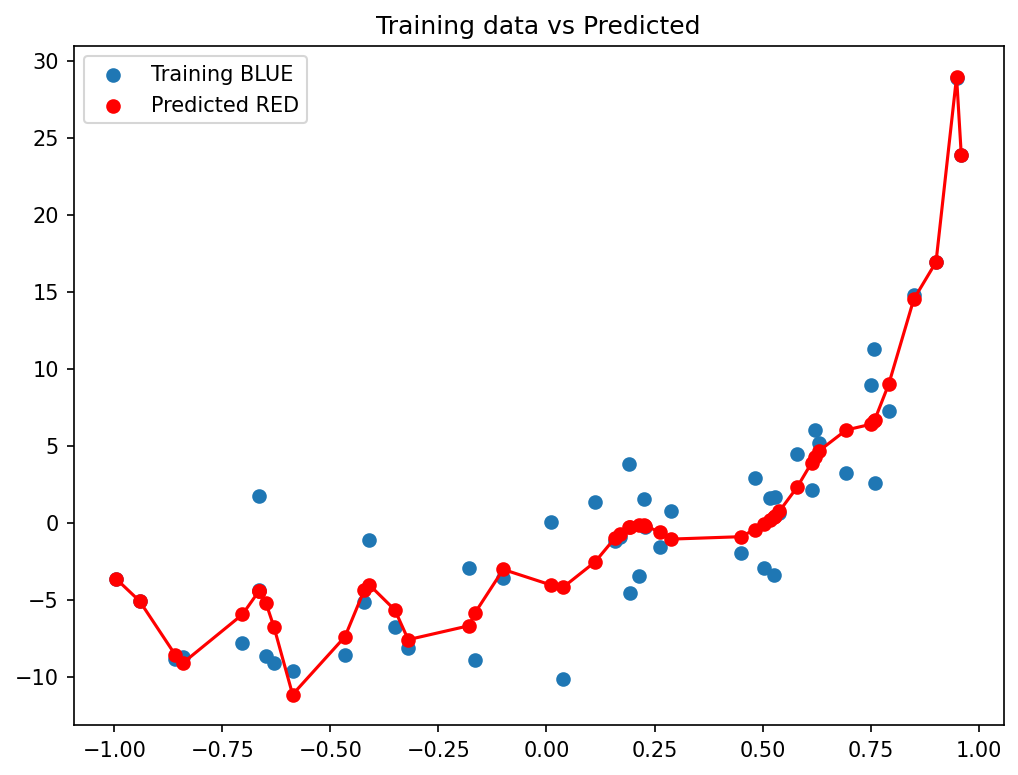

The MSE of the Training data is: 6.474680064998863


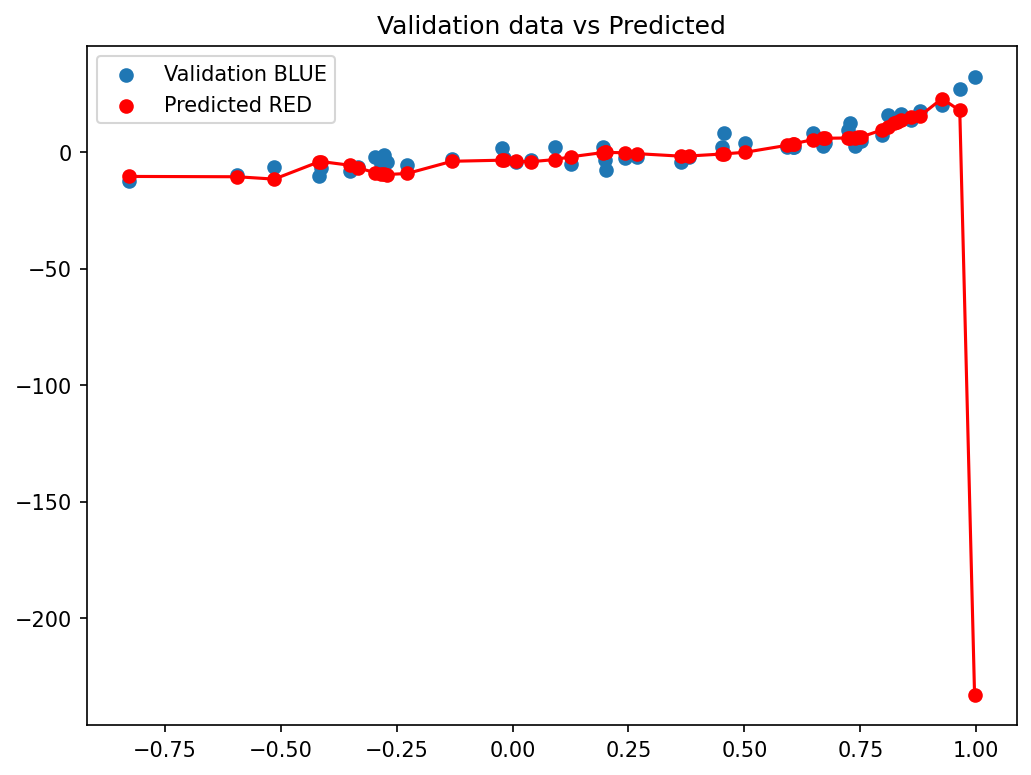

The MSE of the Validation data is: 1418.5143687802413


In [76]:
train_predicted = model.predict(poly_features(X_train))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,train_predicted, color = "r",label = "Predicted RED")
plt.plot(X_train,train_predicted,color = "r")
plt.title("Training data vs Predicted")
plt.legend()
plt.show()

print("The MSE of the Training data is:",mean_squared_error(Y_train,train_predicted))



valid_predicted = model.predict(poly_features(X_valid))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid, valid_predicted, color = "r",label = "Predicted RED")
plt.plot(X_valid,valid_predicted,color = "r")
plt.title("Validation data vs Predicted")
plt.legend()

plt.show()
print("The MSE of the Validation data is:",mean_squared_error(Y_valid,valid_predicted))

We can see the plot is over fitted and consequently has a high MSE on the validation data.

In [77]:
model.coef_

array([[-1.54838532e+01,  1.55838699e+02,  1.90871415e+03,
        -7.74398741e+03, -3.57222246e+04,  1.27165132e+05,
         2.89950110e+05, -1.00166864e+06, -1.25374406e+06,
         4.38838678e+06,  3.15925024e+06, -1.14577838e+07,
        -4.78462777e+06,  1.82422715e+07,  4.28259629e+06,
        -1.73641577e+07, -2.08243121e+06,  9.07759174e+06,
         4.22697493e+05, -2.00438306e+06]])

We can see the coefficients of our function using the model.coef_ fuctiontion.
Part B  L1 Lasso Regressio:

Here we import the Lasso regularizer and fit it same as we did the regressor in part A. We iterate over an alpha from 0 to 1 and store the MSE values in an array to plot and find the lowest MSE.

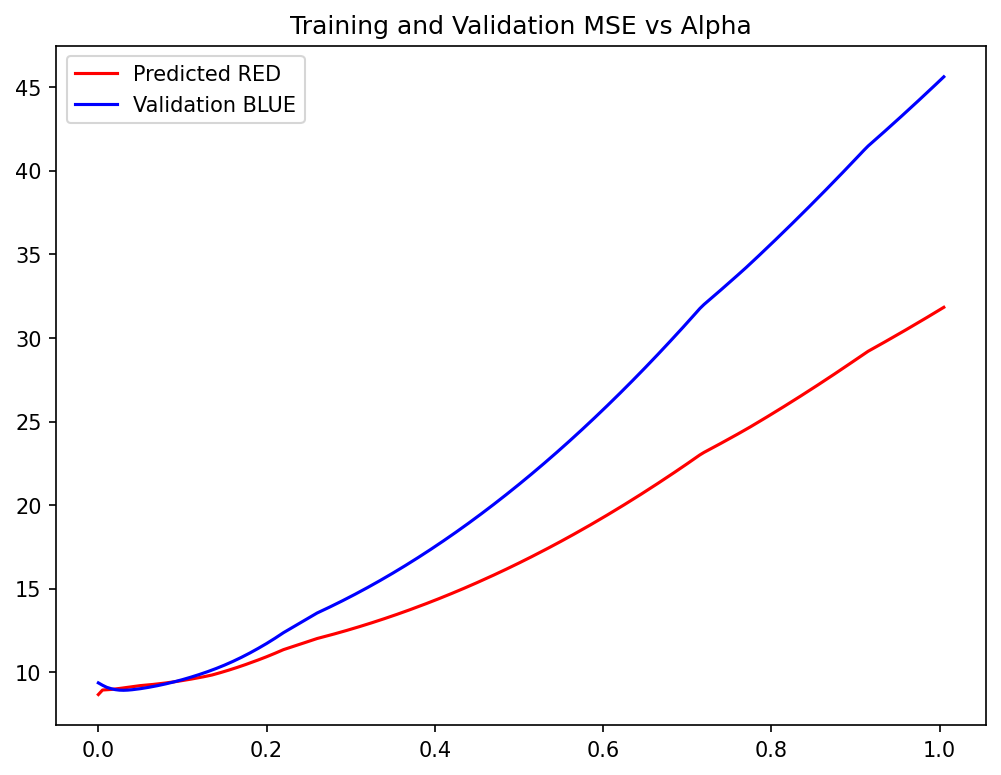

The lowest error of train was:  8.67846869804416 At alpha:  0
The lowest error of valid was:  8.932270739840835 At alpha:  0.030000000000000002


In [78]:
from sklearn.linear_model import Lasso
from itertools import count

alphatracker = []
valid_errtracker,train_errtracker = [],[]

for alpha in count(0, 0.005):  # yields 11 times, a logical error!
    if alpha > 1.01: break

    lasso_reg = Lasso(alpha = alpha)
    lasso_reg.fit(modeltrainer,Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
    err = mean_squared_error(Y_train,y_lasso_poly_pred)
    #print("The MSE of the Training data is: ",err, " With an Alpha of: ",alpha)
    alphatracker.append(alpha)
    train_errtracker.append(err)

    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    #print("The MSE of the Validation data is: ",err, " With an Alpha of: ",alpha)
    valid_errtracker.append(err)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(alphatracker,train_errtracker, color = "r",label = "Predicted RED")
plt.plot(alphatracker,valid_errtracker,color="b",label = "Validation BLUE")
plt.title("Training and Validation MSE vs Alpha")
plt.legend()
plt.show()


mintrain_err = min(train_errtracker)
trainalpha = alphatracker[train_errtracker.index(min(train_errtracker))]

print("The lowest error of train was: ",mintrain_err ,"At alpha: ",trainalpha)


minvalid_err = min(valid_errtracker)
validalpha = alphatracker[valid_errtracker.index(min(valid_errtracker))]

print("The lowest error of valid was: ",minvalid_err ,"At alpha: ",validalpha)

The MSE drops significantly for validation from 1418 to 8.9 with an alpha of 0.03. This alpha is what we will use for L1 regularization.

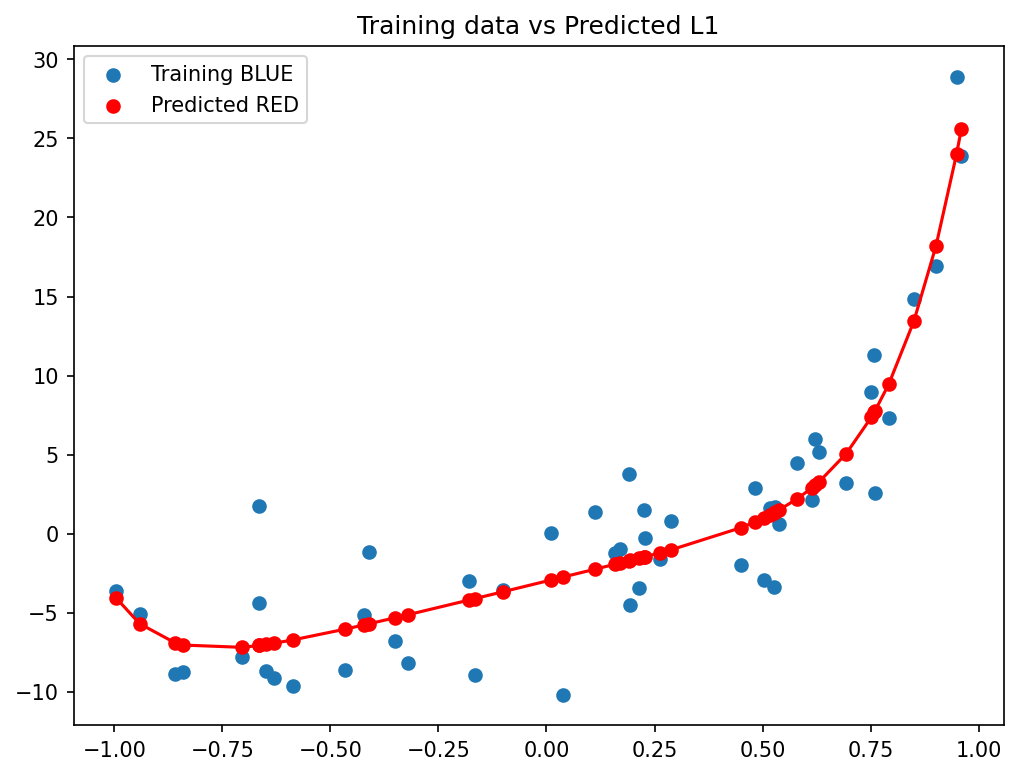

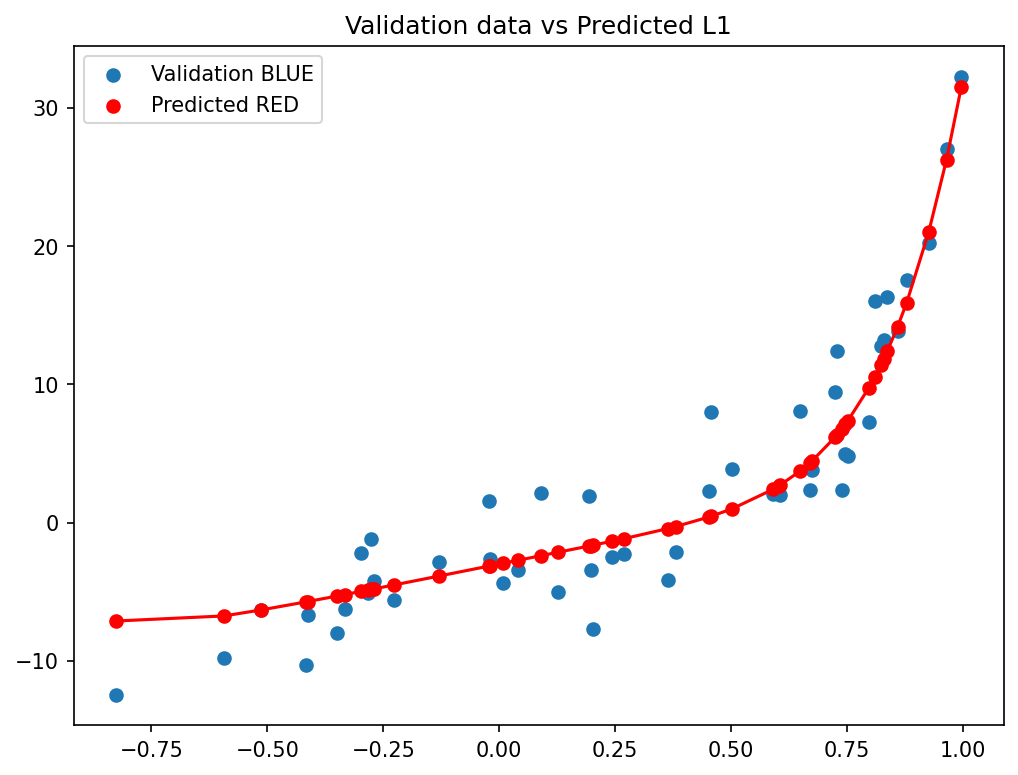

In [80]:
lasso_reg = Lasso(alpha = 0.03)
lasso_reg.fit(modeltrainer,Y_train)
y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_train,y_lasso_poly_pred,color = "r")
plt.title("Training data vs Predicted L1")
plt.legend()
plt.show()


y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_valid,y_lasso_poly_pred,color = "r")
plt.title("Validation data vs Predicted L1")
plt.legend()
plt.show()

Plotting the data we see that our model is significantly less overfitted and now can provide useable predictions.

In [82]:
lasso_reg.coef_

array([6.69647155, 0.        , 0.        , 3.52019837, 7.08269737,
       8.13527443, 4.25918672, 3.13399401, 0.        , 2.33039018,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

We can see the new coefficients of the regulized function with the lasso_reg.coef_

PART C Ridge L2

Here we import the Ridge regularizer and fit it same as we did the regressor in part B. We iterate over an alpha from 0 to 1 and store the MSE values in an array to plot and find the lowest MSE.


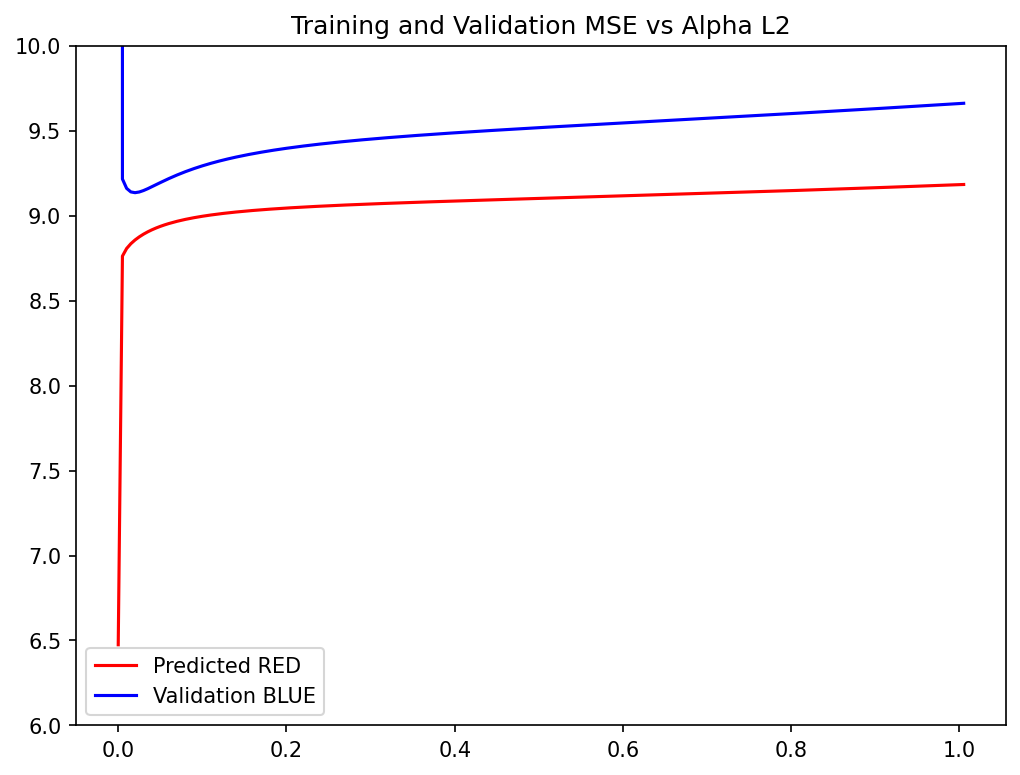

The lowest error of train was:  6.474759716659742 At alpha:  0
The lowest error of valid was:  9.136058641463075 At alpha:  0.02


In [84]:
from sklearn.linear_model import Ridge
from itertools import count

alphatracker = []
valid_errtracker,train_errtracker = [],[]

for alpha in count(0, 0.005):  # yields 11 times, a logical error!
    if alpha > 1.01: break

    lasso_reg = Ridge(alpha = alpha)
    lasso_reg.fit(modeltrainer,Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
    err = mean_squared_error(Y_train,y_lasso_poly_pred)
    #print("The MSE of the Training data is: ",err, " With an Alpha of: ",alpha)
    alphatracker.append(alpha)
    train_errtracker.append(err)

    #lasso_reg.fit(poly_features(X_valid),Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    #print("The MSE of the Validation data is: ",err, " With an Alpha of: ",alpha)
    valid_errtracker.append(err)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(alphatracker,train_errtracker, color = "r",label = "Predicted RED")
plt.plot(alphatracker,valid_errtracker,color="b",label = "Validation BLUE")
plt.title("Training and Validation MSE vs Alpha L2")
plt.legend()
plt.ylim(6, 10)

plt.show()


mintrain_err = min(train_errtracker)
trainalpha = alphatracker[train_errtracker.index(min(train_errtracker))]

print("The lowest error of train was: ",mintrain_err ,"At alpha: ",trainalpha)


minvalid_err = min(valid_errtracker)
validalpha = alphatracker[valid_errtracker.index(min(valid_errtracker))]

print("The lowest error of valid was: ",minvalid_err ,"At alpha: ",validalpha)

The MSE drops significantly for validation from 1418 to 9.13 with an alpha of 0.02. This alpha is what we will use for L2 regularization.


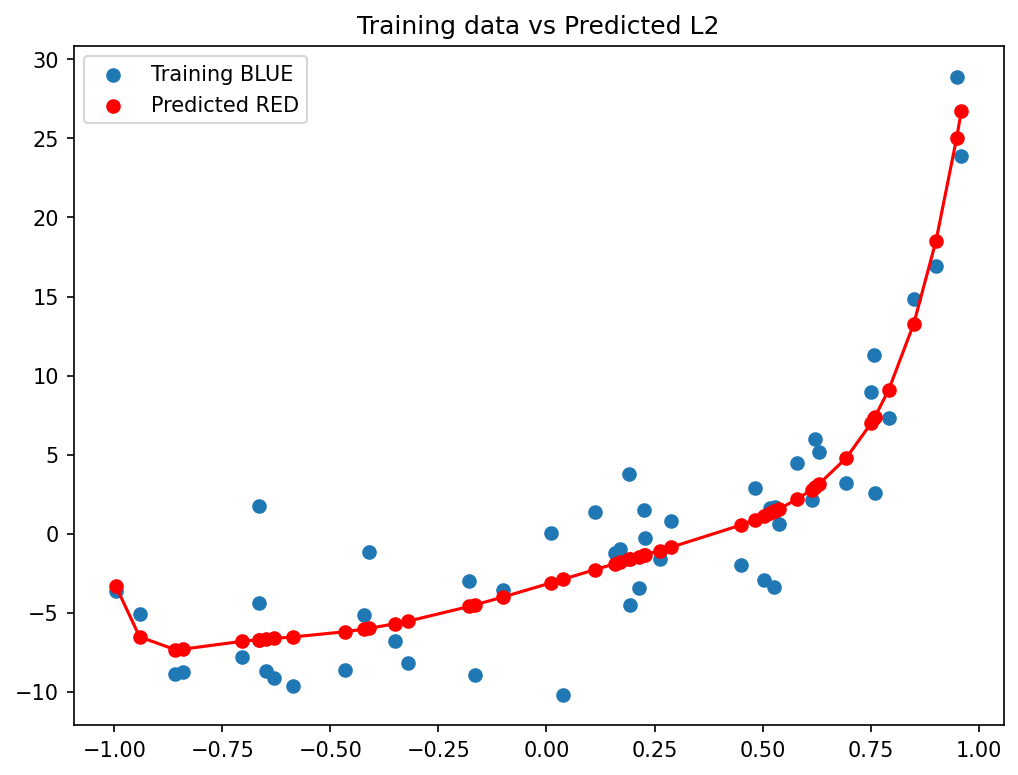

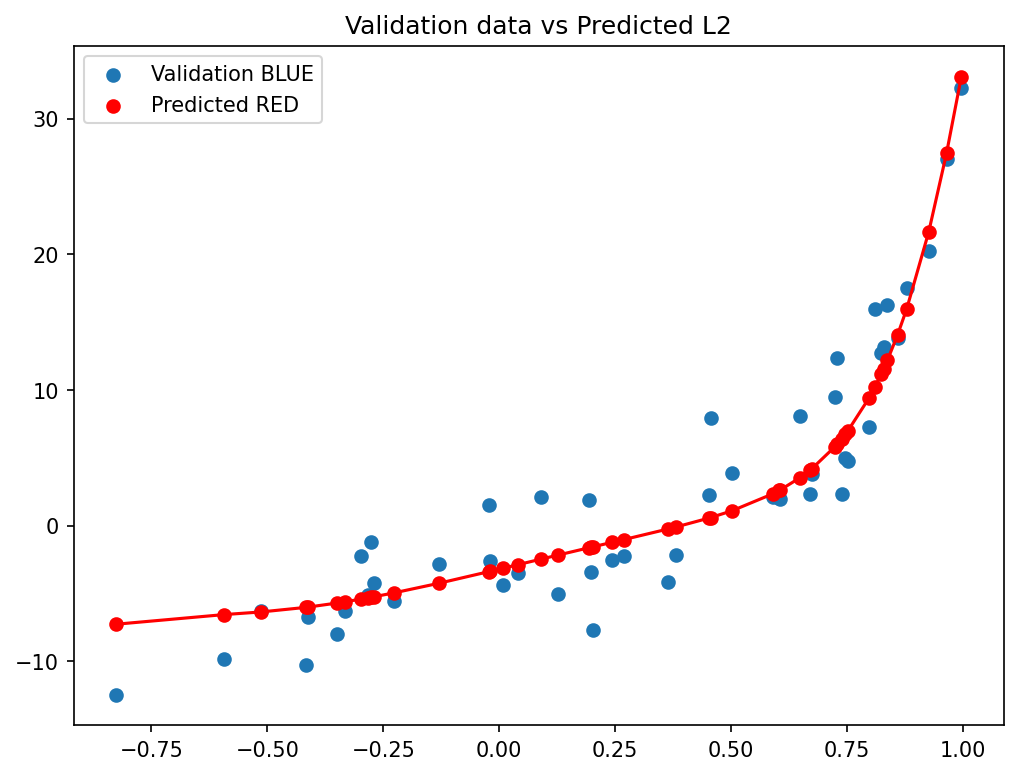

In [85]:
lasso_reg = Ridge(alpha = 0.02)
lasso_reg.fit(modeltrainer,Y_train)
y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_train,y_lasso_poly_pred,color = "r")
plt.title("Training data vs Predicted L2")
plt.legend()
plt.show()


y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_valid,y_lasso_poly_pred,color = "r")
plt.title("Validation data vs Predicted L2")
plt.legend()
plt.show()

Plotting the data we see that our model is significantly less overfitted and now can provide useable predictions.


Part D Elastic

Here we import the Elastic regularizer and fit it same as we did the regressor in part C. We iterate over an alpha from 0 to 1 and store the MSE values in an array to plot and find the lowest MSE. For the elastic we set the L1 ratio to 50%


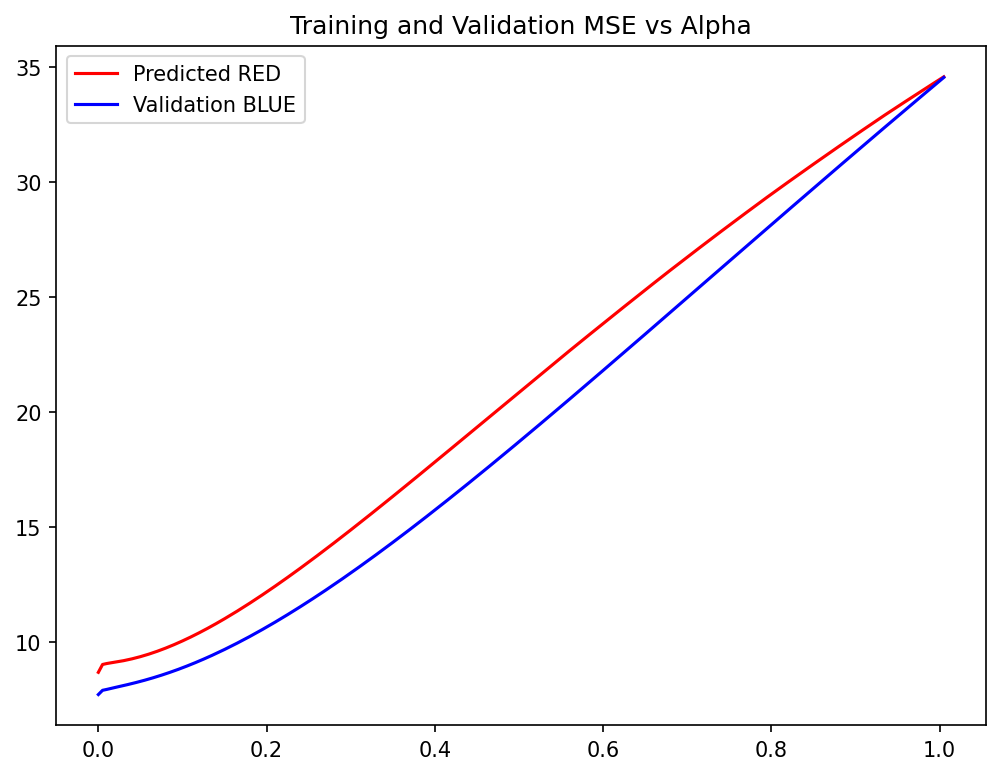

The lowest error of train was:  8.67846869804416 At alpha:  0
The lowest error of valid was:  7.712755872238137 At alpha:  0


In [86]:
from sklearn.linear_model import ElasticNet
from itertools import count

alphatracker = []
valid_errtracker,train_errtracker = [],[]

for alpha in count(0, 0.005):  # yields 11 times, a logical error!
    if alpha > 1.01: break

    lasso_reg = ElasticNet(alpha = alpha, l1_ratio=0.5)
    lasso_reg.fit(modeltrainer,Y_train)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))
    err = mean_squared_error(Y_train,y_lasso_poly_pred)
   # print("The MSE of the Training data is: ",err, " With an Alpha of: ",alpha)
    alphatracker.append(alpha)
    train_errtracker.append(err)

    lasso_reg.fit(poly_features(X_valid),Y_valid)
    y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))
    err = mean_squared_error(Y_valid,y_lasso_poly_pred)
    #print("The MSE of the Validation data is: ",err, " With an Alpha of: ",alpha)
    valid_errtracker.append(err)

plt.figure(figsize=(8, 6), dpi=150)
plt.plot(alphatracker,train_errtracker, color = "r",label = "Predicted RED")
plt.plot(alphatracker,valid_errtracker,color="b",label = "Validation BLUE")
plt.title("Training and Validation MSE vs Alpha")
plt.legend()
plt.show()


mintrain_err = min(train_errtracker)
trainalpha = alphatracker[train_errtracker.index(min(train_errtracker))]

print("The lowest error of train was: ",mintrain_err ,"At alpha: ",trainalpha)


minvalid_err = min(valid_errtracker)
validalpha = alphatracker[valid_errtracker.index(min(valid_errtracker))]

print("The lowest error of valid was: ",minvalid_err ,"At alpha: ",validalpha)

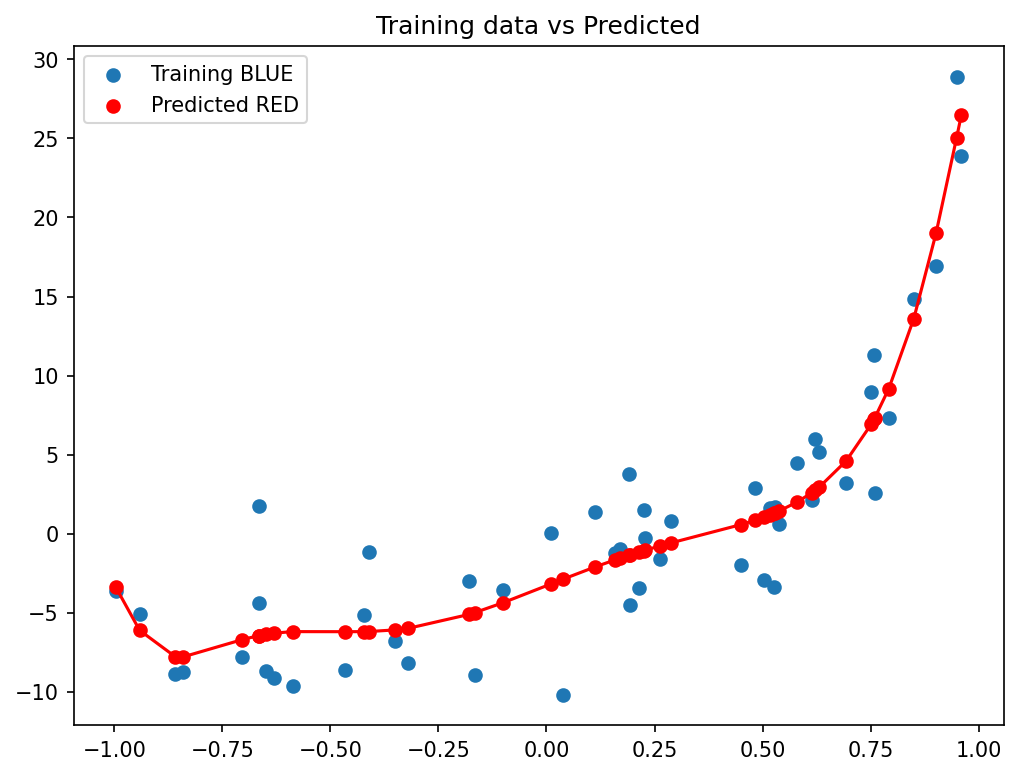

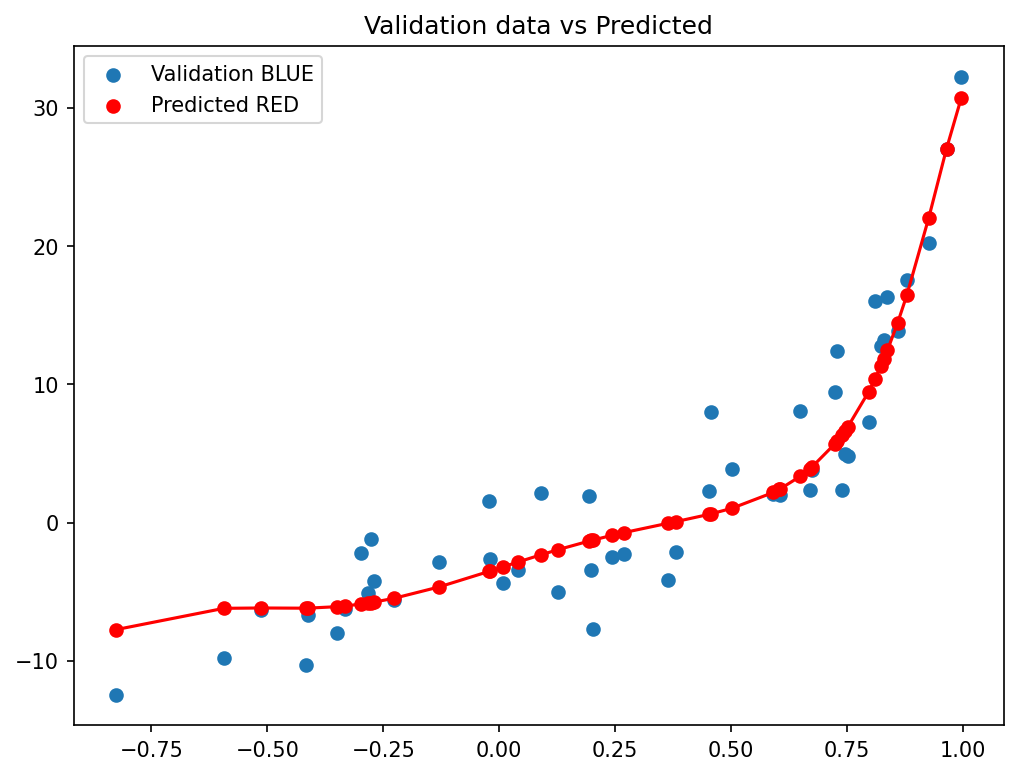

In [60]:
lasso_reg = ElasticNet(alpha = 0)
lasso_reg.fit(modeltrainer,Y_train)
y_lasso_poly_pred = lasso_reg.predict(poly_features(X_train))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_train,Y_train, label = "Training BLUE")
plt.scatter(X_train,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_train,y_lasso_poly_pred,color = "r")
plt.title("Training data vs Predicted")
plt.legend()
plt.show()


y_lasso_poly_pred = lasso_reg.predict(poly_features(X_valid))

plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(X_valid,Y_valid, label = "Validation BLUE")
plt.scatter(X_valid,y_lasso_poly_pred, color = "r",label = "Predicted RED")
plt.plot(X_valid,y_lasso_poly_pred,color = "r")
plt.title("Validation data vs Predicted")
plt.legend()
plt.show()

Plotting the data we see that our model is significantly less overfitted and now can provide usable predictions. but not as accurate as L1 which remains our best option with an MSE of 8.9.


Part E:

From the plots we can assume that the source polynomial is of an even order as both ends point upward. We can estimate based on the plot the polynomial is of order 6 or higher due to its wide base design.